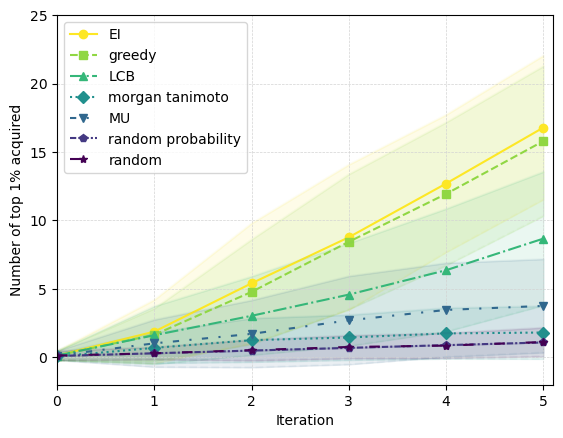

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import glob

def set_dynamic_xticks(ax, max_iterations, desired_ticks=10):
    """
    Dynamically set x-ticks for a given axis.

    Parameters:
    - ax: The axis on which to set the x-ticks.
    - max_iterations: The maximum number of iterations/data points on the x-axis.
    - desired_ticks: The desired maximum number of tick marks on the x-axis (default is 10).
    """
    tick_interval = max_iterations / desired_ticks
    tick_interval = math.ceil(tick_interval)
    ax.set_xticks(np.arange(0, max_iterations + 1, tick_interval))


def get_data(files):
    data_list = {}
    for file in files:
        data = pd.read_csv(file)
        columns_after_rank = data.columns[3:]
        name = file.split('\\')[-1].split('.')[0]
        for column in columns_after_rank:
            data[column] *= 98.92
            pivot_data = data.pivot(index='rank', columns='replicate', values=column)
            pivot_data['Avg.'] = pivot_data.mean(axis=1)
            pivot_data['Std. dev.'] = pivot_data.std(axis=1)
            data_list[name] = pivot_data
    return data_list


def plot_single_graph(data):

    markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', 'H', '+', 'x']
    line_styles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1)), (0, (5, 10))]
    colors = plt.cm.viridis_r(np.linspace(0, 1, len(data)))

    for i, (dataset_name, pivot_data) in enumerate(data.items()):
        color = colors[i]
        marker = markers[i % len(markers)]
        line_style = line_styles[i % len(line_styles)]

        plt.plot(pivot_data.index, pivot_data['Avg.'], marker=marker, label=dataset_name,
                 linestyle=line_style, color=color)
        plt.fill_between(pivot_data.index, pivot_data['Avg.'] - pivot_data['Std. dev.'], 
                         pivot_data['Avg.'] + pivot_data['Std. dev.'], alpha=0.10, color=color)
        
        # Solid lines at the boundaries
        plt.plot(pivot_data.index, pivot_data['Avg.'] - pivot_data['Std. dev.'],
                 linestyle='--', color=color, alpha=0.05)
        plt.plot(pivot_data.index, pivot_data['Avg.'] + pivot_data['Std. dev.'],
                 linestyle='-', color=color, alpha=0.05)

        plt.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')
        plt.xlabel('Iteration')
        plt.ylabel('Number of top 1% acquired')
        plt.xlim(0,5.1)
        plt.ylim(-2, 25)
        plt.legend()

files = glob.glob('**/*.csv', recursive=True)
data = get_data(files)

plot_single_graph(data)